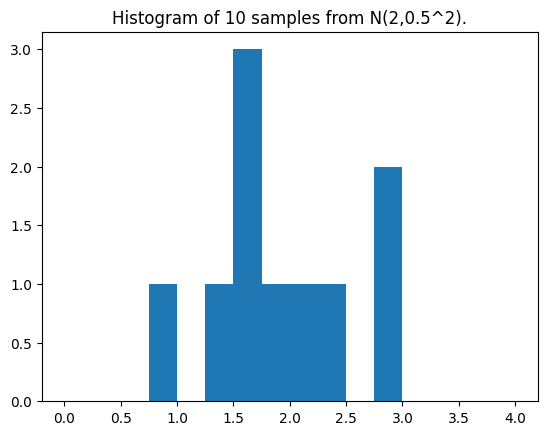

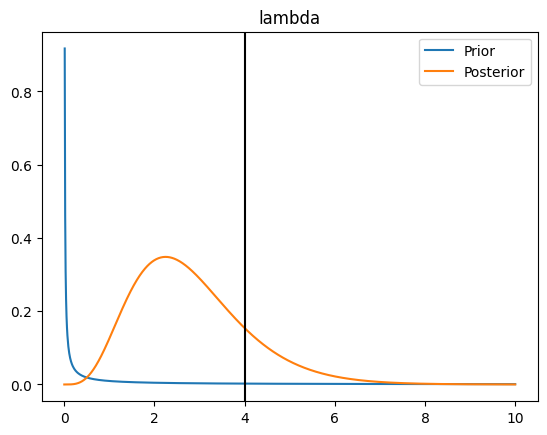

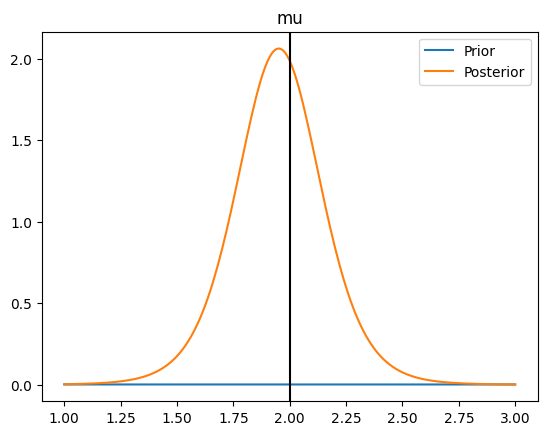

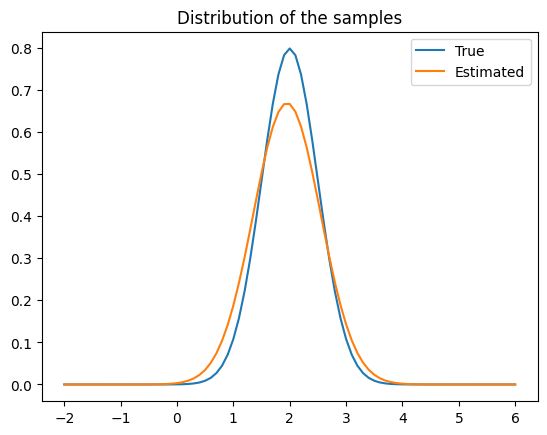

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gamma

# SIMULATE THE TRUE DATA SET
np.random.seed(1)
num_samples = 10
lambda_true = 4
mu_true = 2
sigma_true = 1/np.sqrt(lambda_true)
data_set = np.random.normal(mu_true, sigma_true, num_samples)

plt.hist(data_set, bins=np.arange(0, 4.25, 0.25))
plt.title(f'Histogram of {num_samples} samples from N({mu_true},{sigma_true}^2).')
plt.show()

# SPECIFY PRIORS
a0 = 0.01
b0 = 0.01
mu0 = 0
beta0 = 0.001

# LEARN THE POSTERIOR DISTRIBUTION
sample_mean = np.mean(data_set)
sample_var = np.var(data_set)

a_n = a0 + num_samples / 2
b_n = b0 + (num_samples * sample_var + (beta0 * num_samples * (sample_mean - mu0)**2) / (beta0 + num_samples)) / 2
mu_n = (mu0 * beta0 + num_samples * sample_mean) / (beta0 + num_samples)
beta_n = beta0 + num_samples

# PLOT THE PRIOR AND THE POSTERIOR DISTRIBUTIONS
lambda_range = np.arange(0, 10.01, 0.01)
prior_lambda_pdf = gamma.pdf(lambda_range, a0, scale=1/b0)
posterior_lambda_pdf = gamma.pdf(lambda_range, a_n, scale=1/b_n)

plt.plot(lambda_range, prior_lambda_pdf, label='Prior')
plt.plot(lambda_range, posterior_lambda_pdf, label='Posterior')
plt.axvline(x=lambda_true, color='black')
plt.title('lambda')
plt.legend()
plt.show()


mu_range = np.arange(1, 3.01, 0.01)
gamma_prior_samples = np.random.gamma(a0, 1/b0, 100)
prior_mu_pdf = np.mean([norm.pdf(mu_range, mu0, 1/np.sqrt(beta0*gamma_sample)) for gamma_sample in gamma_prior_samples], axis=0)

gamma_posterior_samples = np.random.gamma(a_n, 1/b_n, 100)
posterior_mu_pdf = np.mean([norm.pdf(mu_range, mu_n, 1/np.sqrt(beta_n*gamma_sample)) for gamma_sample in gamma_posterior_samples], axis=0)

plt.plot(mu_range, prior_mu_pdf, label='Prior')
plt.plot(mu_range, posterior_mu_pdf, label='Posterior')
plt.axvline(x=mu_true, color='black')
plt.title('mu')
plt.legend()
plt.show()

# PLOT THE TRUE AND ESTIMATED DISTRIBUTIONS OF THE SAMPLES
mu_hat = np.sum(posterior_mu_pdf * mu_range) / np.sum(posterior_mu_pdf)
lambda_hat = np.sum(posterior_lambda_pdf * lambda_range) / np.sum(posterior_lambda_pdf)

full_dist_range = np.arange(-2, 6.1, 0.1)
true_pdf = norm.pdf(full_dist_range, mu_true, sigma_true)
estimated_pdf = norm.pdf(full_dist_range, mu_hat, 1/np.sqrt(lambda_hat))

plt.plot(full_dist_range, true_pdf, label='True')
plt.plot(full_dist_range, estimated_pdf, label='Estimated')
plt.title('Distribution of the samples')
plt.legend()
plt.show()